In [1]:
%matplotlib notebook
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def figsize(scale):
    fig_width_pt = 469.75502                         # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

def scale_figsize(wscale, hscale):
    fig_width_pt = 469.75502
    fig_height_pt = 650.43001
    inches_per_pt = 1 / 72.27
    fig_width = fig_width_pt * inches_per_pt * wscale
    fig_height = fig_height_pt * inches_per_pt * hscale
    return (fig_width, fig_height)

# PGF with LaTeX
pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 10,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{siunitx}",
        ]
    }

mpl.rcParams.update(pgf_with_latex)


## Problem 1

This problem requires the students to relate the second order performance
specifications to regions on the complex plane. 

The requirements are for the system to meet the following specs:
\begin{align}
    \% OS &< 5 \% , \\
    T_p &< 1 \\
    T_s &< 5
\end{align}

The second order poles are given by
\begin{align}
    s = - \zeta \omega_n \pm j \omega_n \sqrt{1 - \zeta^2} = - \sigma \pm j \omega_d ,
\end{align}
and the performance specs are related to the system characteristics through the following relationships
\begin{align}
    \zeta &= \frac{- \ln{\frac{\% OS}{100}}}{\sqrt{\pi^2 + \left(\ln{\frac{\% OS}{100}}\right)^2}} , \\
    T_p &= \frac{4}{\omega_d} , \\
    T_s &= \frac{4}{\zeta \omega_n},
\end{align}
we can compute bounds for $ \zeta, \omega_n, \omega_d $. 

Some poles that are feasible $ s = - \pi \pm j (\pi + 0.01) $

In [2]:
OS = 5/100
Tp = 1
Ts = 5

zeta = - np.log(OS) / np.sqrt(np.pi**2 + np.log(OS)**2)
theta = np.arccos(zeta)*180/np.pi
wd = np.pi / Tp
wn = 4 / zeta / Ts

print("Zeta > %3.2f" % zeta)
print("Theta < %3.2f" % theta)
print("Wd > %3.2f" % wd)
print("Wn > %3.2f" % wn)



Zeta > 0.69
Theta < 46.36
Wd > 3.14
Wn > 1.16


## Problem 2

This question serves to test their qualitative understanding of the frequency response and Bode plots.
The frequency response of two systems are shown, the students should answer some questions based on the plots and their shapes. 
This combines their understanding of the Bode plot approximations and it's relationship to the true frequency responses.


<IPython.core.display.Javascript object>


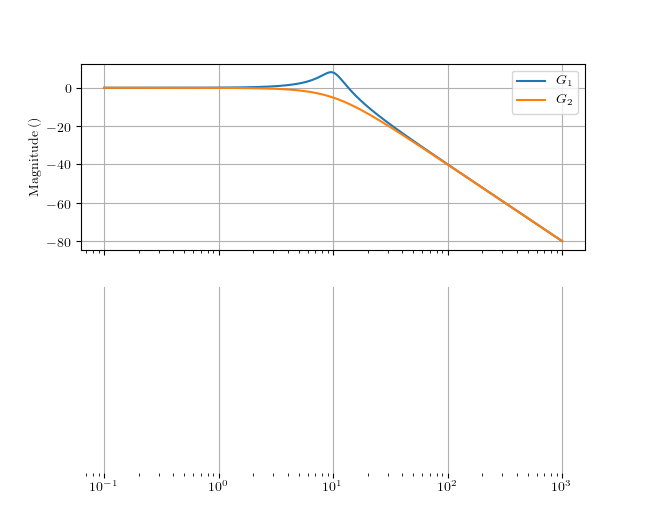

In [3]:
# define two systems

G1 = signal.TransferFunction([100],[1, 2*0.2*10, 100])
G2 = signal.TransferFunction([100], [1, 2*0.9*10, 100])

freq = np.logspace(-1, 3, 500)
# generate and plot their frequency responses
w1, mag1, phase1 = signal.bode(G1, freq)
w2, mag2, phase2 = signal.bode(G2, freq)

fig, axarr=plt.subplots(2,1, figsize=scale_figsize(1, 0.59), sharex=True)
axarr[0].semilogx(w1,mag1, label=r'$G_1$')
axarr[0].semilogx(w2, mag2, label=r'$G_2$')

axarr[0].set_ylabel(r'Magnitude (\si{\decibel})')
axarr[0].legend([r'$G_1$', r'$G_2$'])
axarr[0].grid(True)

axarr[1].semilogx(w1, phase1, label=r'$G_1$')
axarr[1].semilogx(w2, phase2, label=r'$G_2$')

axarr[1].set_xlabel(r'Frequency (\si{\radian\per\second})')
axarr[1].set_ylabel(r'Phase (\si{\degree})')
axarr[1].legend([r'$G_1$', r'$G_2$'])
axarr[1].grid(True)

# plt.savefig('prob1_bode.eps')
# plt.savefig('pgf/prob1_bode.pgf')
plt.show()


## Problem 3

This problem gives several transfer functions and the students should match them to their frequency response plots. 
This tests the ability to use the bode approximations without actually forcing them to draw the plots.



<IPython.core.display.Javascript object>


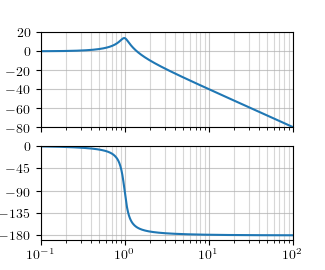

In [4]:
# Define a bunch transfer functions and plot their frequency response
# define the scale for the figures in the paper
bode_wscale = 0.5
bode_hscale = 0.3

G1 = signal.TransferFunction([1],[1, 0.2, 1])
G2 = signal.TransferFunction([2, 4], [1, 0.5, 4])
G3 = signal.TransferFunction([-2, 4], [1, 0.5, 4])

freq = np.logspace(-1, 2, 500)
# generate and plot their frequency responses
w1, mag1, phase1 = signal.bode(G1, freq)
w2, mag2, phase2 = signal.bode(G2, freq)
w3, mag3, phase3 = signal.bode(G3, freq)

# first transfer function
fig1, axarr1=plt.subplots(2,1, figsize=scale_figsize(bode_wscale, bode_hscale), sharex=True)
axarr1[0].semilogx(w1,mag1, label=r'$G_1$')
# axarr1[0].set_ylabel(r'Magnitude (\si{\decibel})')
axarr1[0].grid(which='minor', alpha=0.5)                                                
axarr1[0].grid(which='major', alpha=0.7)
axarr1[0].set_xlim([0.1, 100])
axarr1[0].set_ylim([-80,20])
axarr1[0].set_yticks(np.arange(-80,21,20))

axarr1[1].semilogx(w1, phase1, label=r'$G_1$')
# axarr1[1].set_xlabel(r'Frequency (\si{\radian\per\second})')
# axarr1[1].set_ylabel(r'Phase (\si{\degree})')
axarr1[1].grid(which='minor', alpha=0.5)                                                
axarr1[1].grid(which='major', alpha=0.7)
axarr1[1].set_ylim([-190, 0])
axarr1[1].set_yticks(np.arange(-180, 1, 45))

# plt.savefig('G1.eps')
# plt.savefig('pgf/G1.pgf')
plt.show()

<IPython.core.display.Javascript object>


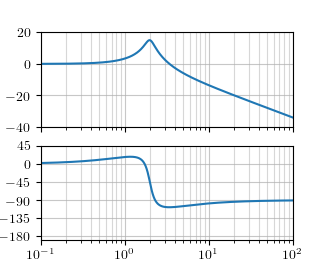

In [5]:
# second transfer function
fig2, axarr2=plt.subplots(2,1, figsize=scale_figsize(bode_wscale, bode_hscale), sharex=True)
axarr2[0].semilogx(w2,mag2)
# axarr2[0].set_ylabel(r'Magnitude (\si{\decibel})')
axarr2[0].grid(which='minor', alpha=0.5)                                                
axarr2[0].grid(which='major', alpha=0.7)
axarr2[0].set_xlim([0.1, 100])
axarr2[0].set_ylim([-40,20])
axarr2[0].set_yticks(np.arange(-40,21,20))

axarr2[1].semilogx(w2, phase2)
# axarr2[1].set_xlabel(r'Frequency (\si{\radian\per\second})')
# axarr2[1].set_ylabel(r'Phase (\si{\degree})')
axarr2[1].grid(which='minor', alpha=0.5)                                                
axarr2[1].grid(which='major', alpha=0.7)
axarr2[1].set_ylim([-190, 45])
axarr2[1].set_yticks(np.arange(-180, 46, 45))

# plt.savefig('G2.eps')
# plt.savefig('pgf/G2.pgf')
plt.show()

<IPython.core.display.Javascript object>


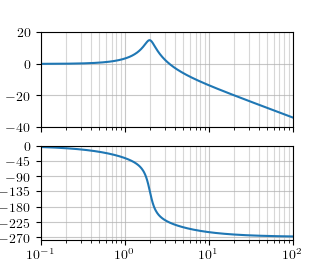

In [6]:
# third transfer function
fig3, axarr3=plt.subplots(2,1, figsize=scale_figsize(bode_wscale, bode_hscale), sharex=True)
axarr3[0].semilogx(w3,mag3)
# axarr3[0].set_ylabel(r'Magnitude (\si{\decibel})')
axarr3[0].grid(which='minor', alpha=0.5)                                                
axarr3[0].grid(which='major', alpha=0.7)
axarr3[0].set_xlim([0.1, 100])
axarr3[0].set_ylim([-40,20])
axarr3[0].set_yticks(np.arange(-40,21,20))

axarr3[1].semilogx(w3, phase3)
# axarr3[1].set_xlabel(r'Frequency (\si{\radian\per\second})')
# axarr3[1].set_ylabel(r'Phase (\si{\degree})')
axarr3[1].grid(which='minor', alpha=0.5)                                                
axarr3[1].grid(which='major', alpha=0.7)
axarr3[1].set_ylim([-280, 0])
axarr3[1].set_yticks(np.arange(-270, 1, 45))

# plt.savefig('G3.eps')
# plt.savefig('pgf/G3.pgf')
plt.show()

### Problem 3 Part 2

Now we'll show them plots of the sinusoidal response for each of the transfer functions. To make it a little simpler, I'll give them a known input function and they have to match the response to the appropriate transfer function.

Assuming they correctly answered the first question they can simply look at the bode plots and find the correct phase and magnitude of the response. 

If not, they'll have to do some math to find the appropriate response.

<IPython.core.display.Javascript object>


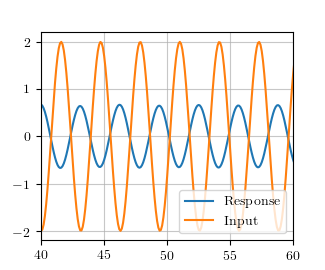

In [7]:
t = np.linspace(0, 100, 1000)
# define a known sinusoidal input
u = 2*np.sin(2*t+0)

xlim = [40, 60]
t1, y1, x1 = signal.lsim(G1, u, t)
t2, y2, x2 = signal.lsim(G2, u, t)
t3, y3, x3 = signal.lsim(G3, u, t)

# first transfer function
fig1, axarr1=plt.subplots(1,1, figsize=scale_figsize(bode_wscale, bode_hscale))
axarr1.plot(t1, y1, label=r'Response')
axarr1.plot(t1, u, label=r'Input')
# axarr1.set_ylabel(r'Output')
axarr1.grid(which='minor', alpha=0.5)                                                
axarr1.grid(which='major', alpha=0.7)
axarr1.set_xlim(xlim)
axarr1.legend(loc='lower right')
# plt.savefig('G1_sinusoidal.eps')
# plt.savefig('pgf/G1_sinusoidal.pgf')
plt.show()

<IPython.core.display.Javascript object>


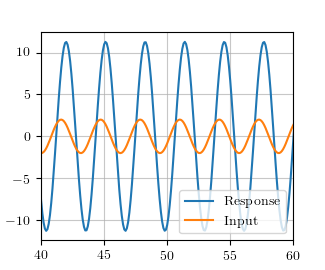

In [8]:
# second transfer function
fig2, axarr2=plt.subplots(1,1, figsize=scale_figsize(bode_wscale, bode_hscale))
axarr2.plot(t2, y2, label=r'Response')
axarr2.plot(t2, u, label=r'Input')
# axarr2.set_ylabel(r'Output')
axarr2.grid(which='minor', alpha=0.5)                                                
axarr2.grid(which='major', alpha=0.7)
axarr2.set_xlim(xlim)
axarr2.legend(loc='lower right')
# plt.savefig('G2_sinusoidal.eps')
# plt.savefig('pgf/G2_sinusoidal.pgf')
plt.show()

<IPython.core.display.Javascript object>


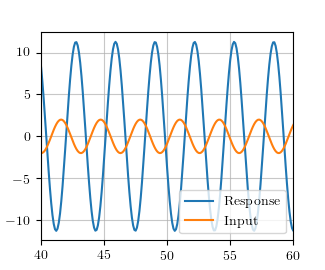

In [9]:
# third transfer function
fig3, axarr3=plt.subplots(1,1, figsize=scale_figsize(bode_wscale, bode_hscale))
axarr3.plot(t3, y3, label=r'Response')
axarr3.plot(t3, u, label=r'Input')
# axarr3.set_ylabel(r'Output')
axarr3.grid(which='minor', alpha=0.5)                                                
axarr3.grid(which='major', alpha=0.7)
axarr3.set_xlim(xlim)
axarr3.legend(loc='lower right')
# plt.savefig('G3_response.eps')
# plt.savefig('pgf/G3_response.pgf')
plt.show()

## Problem 4

This problem requires them to draw a bode plot using the appropriate approximations

\begin{align}
    G = \frac{500 (s + 40)}{s^2 + 8 s + 25}
\end{align}

<IPython.core.display.Javascript object>


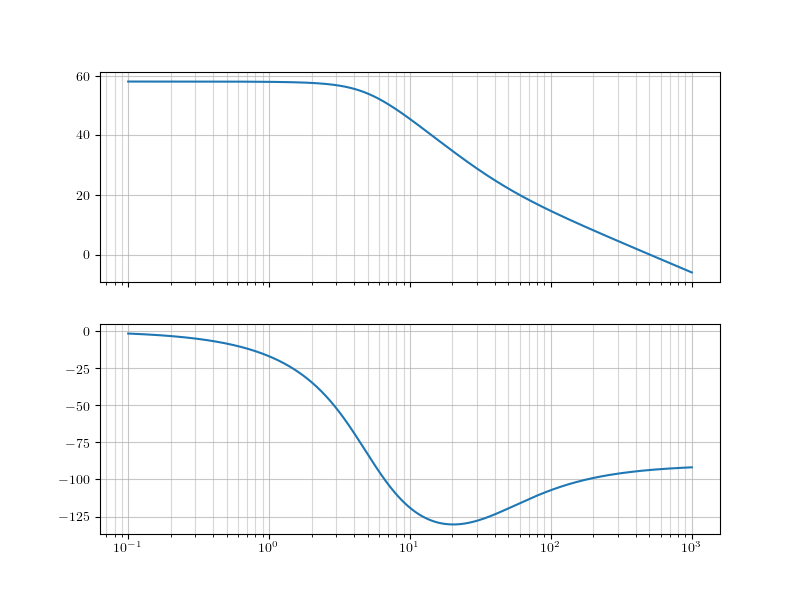

In [11]:
G = signal.TransferFunction([500, 20000], [1, 8, 25])

freq = np.logspace(-1, 3, 500)
# generate and plot their frequency responses
w, mag, phase = signal.bode(G, freq )

fig, axarr = plt.subplots(2,1, figsize=(8,6), sharex=True)
axarr[0].semilogx(w, mag, label=r'$G$')
# axarr[0].set_ylabel(r'Magnitude (\si{\decibel})')
axarr[0].grid(which='minor', alpha=0.5)                                                
axarr[0].grid(which='major', alpha=0.7)


axarr[1].semilogx(w, phase, label=r'$G$')
# axarr[1].set_xlabel(r'Frequency (\si{\radian\per\second})')
# axarr[1].set_ylabel(r'Phase (\si{\degree})')
axarr[1].grid(which='minor', alpha=0.5)                                                
axarr[1].grid(which='major', alpha=0.7)


# plt.savefig('G1.eps')
# plt.savefig('pgf/G1.pgf')
plt.show()

In [35]:
# evaluate at w = 25
w, mag25, phase25 = signal.bode(G, [25],1)
print('Mag: %3.2f db' % mag25)
print('Phase: %5.4g deg' % phase25)

# compute the output
print('Output mag: %3.2f ' % (5*np.log10(mag25[0]/20)))
print('Output phase: %3.2f' % (phase25))

Mag: 31.43 db
Phase: -129.6 deg
Output mag: 0.98 
Output phase: -129.56
